In [106]:
import pandas as pd
import numpy as np
import MySQLdb as my
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def load_db():
    fname="../dbcreds.dat" 
    f = open(fname,"r")
    #rstrip() is needde here or else it includse the newline from the creds file
    dbhost = f.readline().split(' ')[1].rstrip()
    dbuser = f.readline().split(' ')[1].rstrip()
    dbpw = f.readline().split(' ')[1].rstrip()
    dbdb = f.readline().split(' ')[1].rstrip()
    f.close()

    db = my.connect(host=dbhost,
            user=dbuser,
            passwd=dbpw,
            db=dbdb
            )
    return db



In [126]:
# Over Single Month Period (30 days)
db = load_db()
cursor = db.cursor()
#date_from = '\'2018-01-31\''
#date_to = '\'2018-02-31\'' 
# Fix this naming
#sql = 'select lower(blurb),date from article_url where date <= ' +  date_to   + ' and >= ' + date_from
sql = 'select lower(blurb),date from article_url where date <=  "2018-03-31"  and date >= "2018-02-31"     '

cursor.execute(sql)
blurb_date_list = list(cursor.fetchall())
db.close()

In [127]:
#df = pd.read_sql('select lower(blurb),date from article_url where date = "2018-01-01"', con=db)

In [128]:
#print df

In [129]:
date_freq = {}
target = 'trump'
for blurb,date in blurb_date_list:
    if target in blurb:
        if date in date_freq:
            date_freq[date] += 1
        else:
            date_freq[date] = 0
#rint date_freq

In [130]:
# https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
# Avoiding 'ValueError: If using all scalar values, you must pass an index' error
# Need to do reset index based on this in order to assign new column names we can pass into seaborn later 
# https://stackoverflow.com/questions/28503445/assigning-column-names-to-a-pandas-series
trump_df = pd.Series(date_freq).to_frame().reset_index()
trump_df.columns = ['date','freq']
#print trump_df

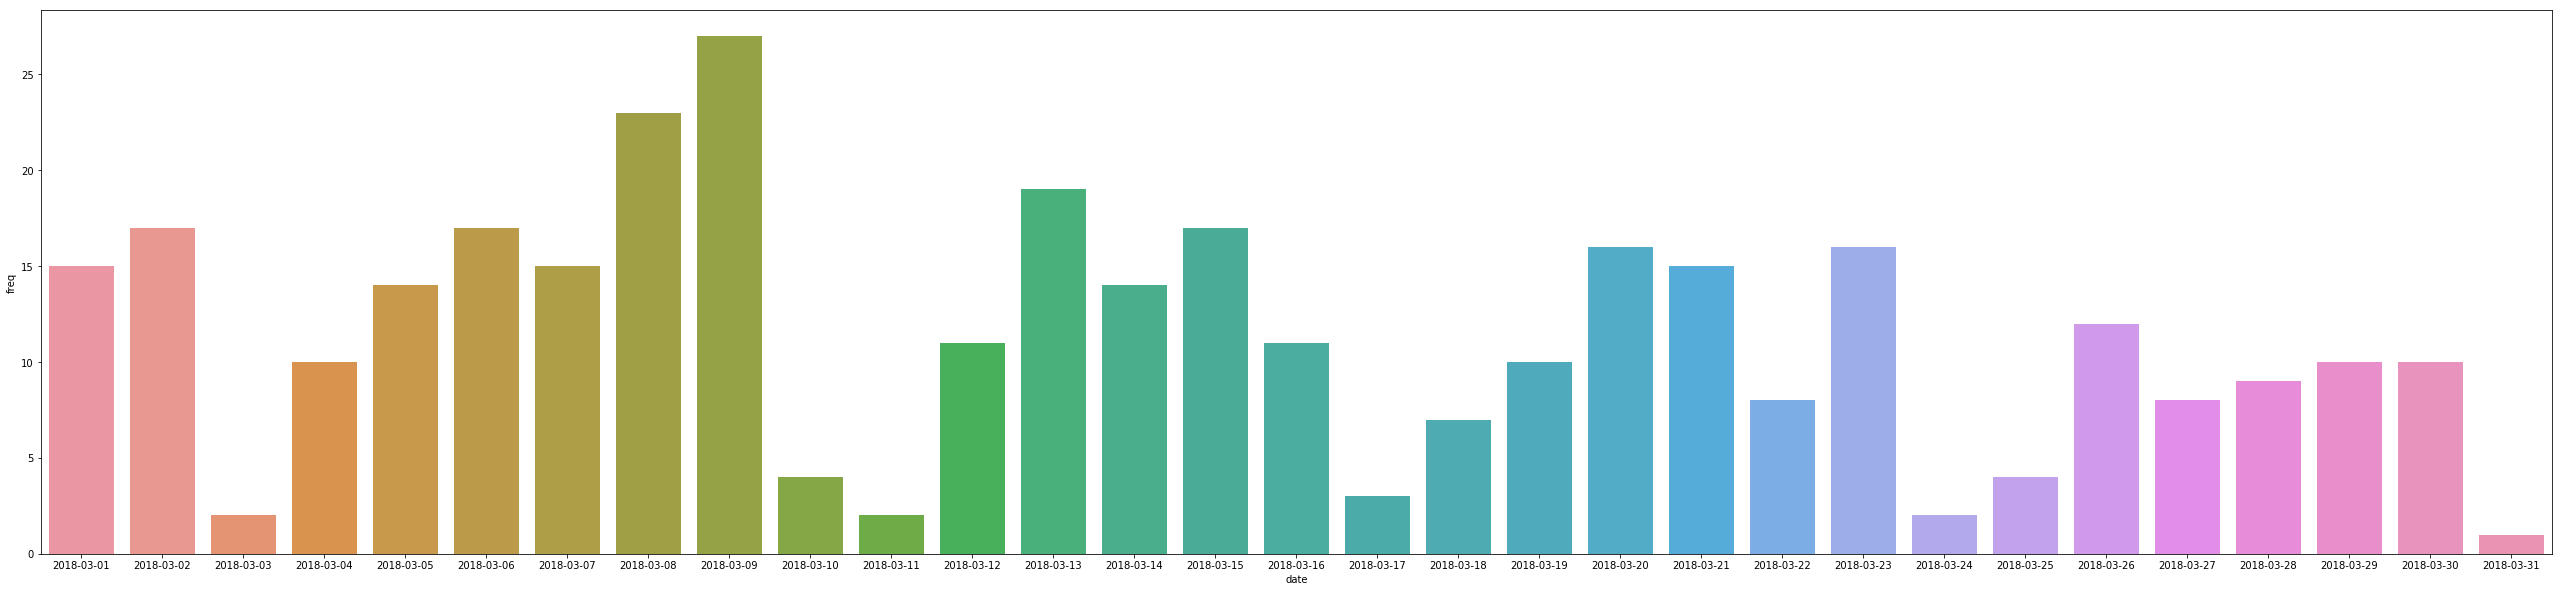

In [131]:
plt.figure(figsize=(45,10))
ax = sns.barplot(x="date", y="freq", data=trump_df)
#plt.savefig('2_trump_freq.pdf')

In [132]:
#Over Entire Year

db = load_db()
cursor = db.cursor()
sql = 'select lower(blurb),date from article_url'
cursor.execute(sql)
blurb_date_list = list(cursor.fetchall())
db.close()

In [248]:
date_freq = {}
target = 'oil'
for blurb,date in blurb_date_list:
    if target in blurb:
        if date.month in date_freq:
            date_freq[date.month] += 1
        else:
            date_freq[date.month] = 0
#rint date_freq

In [249]:
# https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
# Avoiding 'ValueError: If using all scalar values, you must pass an index' error
# Need to do reset index based on this in order to assign new column names we can pass into seaborn later 
# https://stackoverflow.com/questions/28503445/assigning-column-names-to-a-pandas-series
trump_df = pd.Series(date_freq).to_frame().reset_index()
trump_df.columns = ['month','freq']
#print trump_df

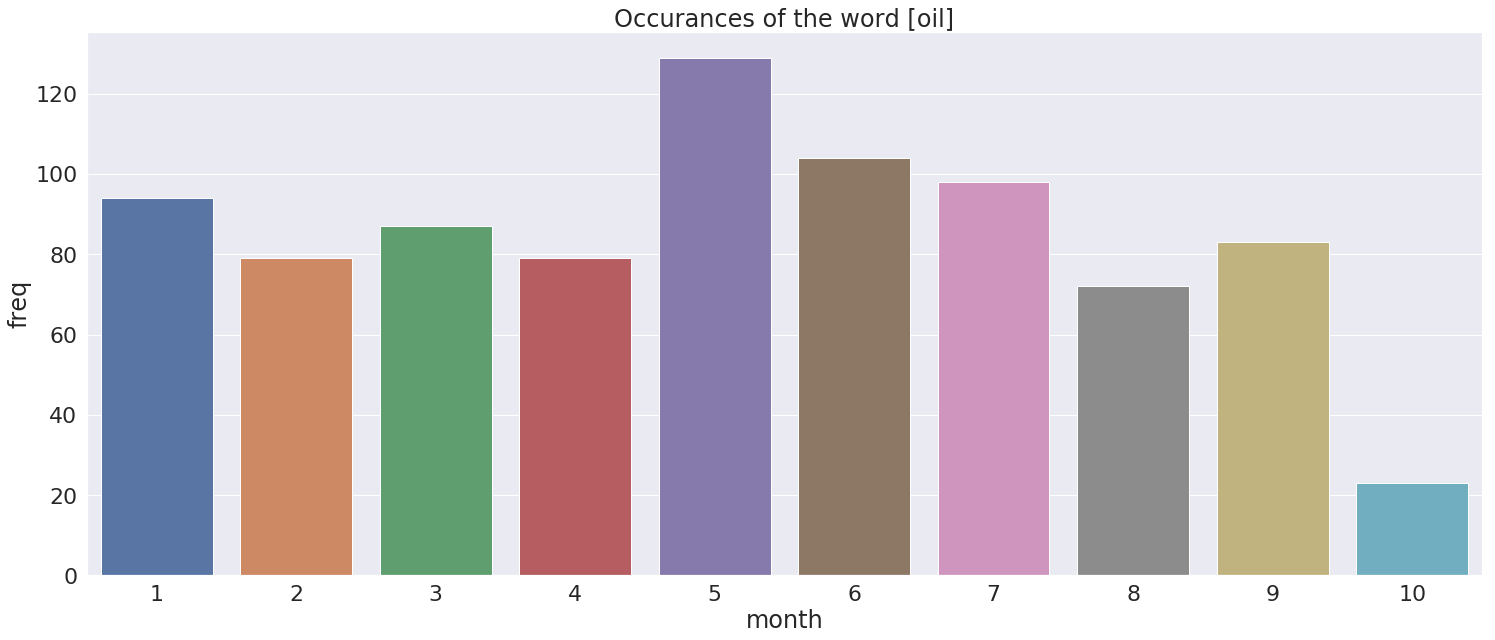

In [250]:

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
ax = sns.barplot(x="month", y="freq", data=trump_df).set_title('Occurances of the word [' + target + ']')
plt.savefig('../results/' + target + '_year_freq.pdf')